In [1]:
from mesa import Agent, Model
from mesa.space import NetworkGrid
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
import networkx as nx
import graph_init
import pandas as pd
import station as st

import network_example as ne
import numpy as np
import pathfinding as pf
import graph_functions as gf
import matplotlib.pyplot as plt
import particle_swarm as ps
import model as m
import commuter as c

In [2]:
# test the model with 5 agents and full bike capacity

model = m.MyModel(100, seed=1)
for i in range(1000):
    model.step()

agent_data = model.datacollector.get_agent_vars_dataframe()
pd.reset_option('display.max_rows', None)
agent_data[['Distance_Left', "Position", 'Intermediate_Node', 'Destination', 'All Station Capacity', 'Biking', 'Park Failures']]

# print the 1000 index



Distance_Left  Position  Intermediate_Node  Destination  \
Step AgentID                                                            
0    1                 50.0         5                  1            6   
     2                 50.0         4                  0            7   
     3                 50.0         6                  2            4   
     4                 50.0         4                  0            7   
     5                 50.0         7                  3            5   
...                     ...       ...                ...          ...   
1000 96                41.0         2                  6            6   
     97                 4.0         1                  5            5   
     98                37.0         5                  1            6   
     99                18.0         4                  0            6   
     100               29.0         3                  7            7   

                      All Station Capacity  Biking  Park Failures  
Step AgentID                                                       
0    1        [0:{3}, 1:{3}, 2:{3}, 3:{3}]   False              0  
     2        [0:{3}, 1:{3}, 2:{3}, 3:{3}]   False              0  
     3        [0:{3}, 1:{3}, 2:{3}, 3:{3}]   False              0  
     4        [0:{3}, 1:{3}, 2:{3}, 3:{3}]   False              0  
     5        [0:{3}, 1:{3}, 2:{3}, 3:{3}]   False              0  
...                                    ...     ...            ...  
1000 96       [0:{3}, 1:{0}, 2:{2}, 3:{2}]   False              0  
     97       [0:{3}, 1:{0}, 2:{2}, 3:{2}]   False              0  
     98       [0:{3}, 1:{0}, 2:{2}, 3:{2}]   False              0  
     99       [0:{3}, 1:{0}, 2:{2}, 3:{2}]   False              0  
     100      [0:{3}, 1:{0}, 2:{2}, 3:{2}]   False              0  

[100100 rows x 7 columns]

In [3]:
model.time_saved_ratio()

(np.float64(105280.0), 92745, np.float64(0.8809365501519757))

Station 0 has 3 bikes
Station 1 has 3 bikes
Station 2 has 3 bikes
Station 3 has 3 bikes


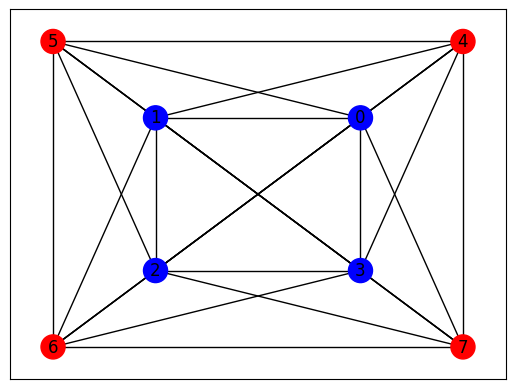

In [4]:
n_stations = 4
G, total_nodes = ne.basic_graph()
pos = {i: total_nodes[i] for i in range(total_nodes.shape[0])}
colors = ['r' if G.nodes[i]['type'] == 'destination' else 'b' for i in G.nodes]
nx.draw_networkx(G, pos, node_color=colors, with_labels=True)
# print the number of bikes at each station
for i in range(n_stations):
    print('Station', i, 'has', G.nodes[i]['data'].available_bikes, 'bikes')

{0: {'pos': (-4.5, 0), 'type': 'destination', 'data': None}, 1: {'pos': (4.5, 0), 'type': 'destination', 'data': None}}


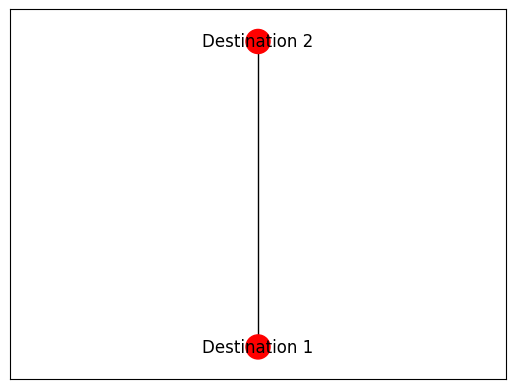

In [5]:
destinations_coords = [
    (0, -4.5), #McCombs
    (0, 4.5) #Target
]

G,s,d = gf.create_graph_from_coordinates([], destinations_coords)
#print(s)
#print(d)

pos = {i: d["Destination " + str(i+1)] for i in range(len(d))}
print(pos)
colors = ['r' if G.nodes[i]['type'] == 'destination' else 'b' for i in G.nodes]
nx.draw_networkx(G, {"Destination 1": [0, -4.5], "Destination 2": [0, 4.5]}, node_color = colors, with_labels=True)



In [11]:
destinations = [i for i in G.nodes if G.nodes[i]['type'] == 'destination']

#destinationcoords = [(pos[i][0], pos[i][1]) for i in destinations]
destinationcoords = [(0, -4.5), (0, 4.5)]
G,s,d = gf.create_graph_from_coordinates([], destinationcoords)
citymap = [(-6,-6), (6,6)] + destinationcoords
w = [0.5, 0.5]
def fitness(coordinatelist):
    destinations = coordinatelist["destination"]
    stations = coordinatelist["station"]
    G, s, d, = gf.create_graph_from_coordinates(stations, destinations)
    model = m.MyModel(30, seed=1, G=G, weights = w)
    for i in range(100):
        model.step()
    return model.time_saved_ratio()[2]

print(fitness({"destination": destinationcoords, "station": destinationcoords}))

optimizer = ps.PSO(citymap, fitness, 0.9,1.4,1.5)
bestpos, bestfit = optimizer.optimize(20, 2, 50)
print(bestfit)
stations = [(bestpos[i], bestpos[i+1]) for i in range(0, len(bestpos), 2)]
print(stations)
G, s, d, = gf.create_graph_from_coordinates(stations, destinationcoords)

0.42962962962962964


  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 0: Best fitness: 0.4888888888888889
Iteration 10: Best fitness: 0.4888888888888889
Iteration 20: Best fitness: 0.4282051282051282
Iteration 30: Best fitness: 0.4170940170940171
Iteration 40: Best fitness: 0.4170940170940171
0.4170940170940171
[(np.float64(-1.2182304098290493), np.float64(6.087506817316901)), (np.float64(-3.6329743227101776), np.float64(-5.35710198989356))]


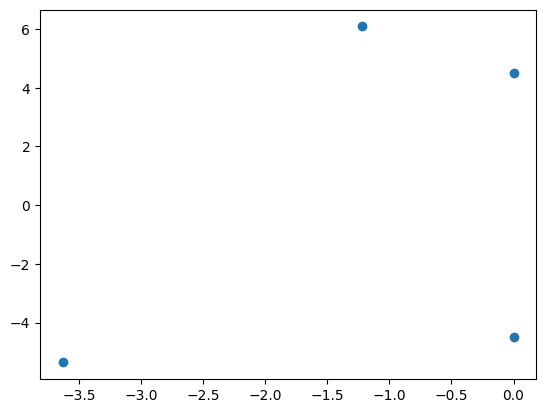

In [12]:
x = [i[0] for i in stations] + [i[0] for i in destinationcoords]
y = [i[1] for i in stations] + [i[1] for i in destinationcoords]
plt.scatter(x,y)